## Gerekli kütüphaneler:

In [1]:
import sys

sys.path.append("../..")

import os
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from utils.ml_features.preprocessing import extract_features, apply_pca

## Test verisinin yüklenmesi:

In [2]:
test_dir = "../../data/uc_merced"
classes = sorted(os.listdir(test_dir))

X_test, y_test = [], []

for idx, cls in enumerate(classes):
    folder = os.path.join(test_dir, cls)
    for fname in os.listdir(folder):
        if fname.endswith(".jpg"):
            img_path = os.path.join(folder, fname)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))

            feat = extract_features(img)
            X_test.append(feat)
            y_test.append(idx)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Test verisi şekli:", X_test.shape)


Test verisi şekli: (2100, 1803)


## Modellerin yüklenmesi:


Model: uc_merced_gb.pkl
                   precision    recall  f1-score   support

     agricultural       0.98      0.94      0.96       100
         airplane       0.93      0.82      0.87       100
  baseballdiamond       0.94      0.88      0.91       100
            beach       0.98      0.98      0.98       100
        buildings       0.86      0.82      0.84       100
        chaparral       0.95      0.95      0.95       100
 denseresidential       0.81      0.88      0.85       100
           forest       0.99      0.95      0.97       100
          freeway       0.97      0.96      0.96       100
       golfcourse       0.89      0.94      0.91       100
           harbor       0.95      0.94      0.94       100
     intersection       0.94      0.95      0.95       100
mediumresidential       0.83      0.91      0.87       100
   mobilehomepark       0.93      0.94      0.94       100
         overpass       0.96      0.90      0.93       100
       parkinglot       0.91  

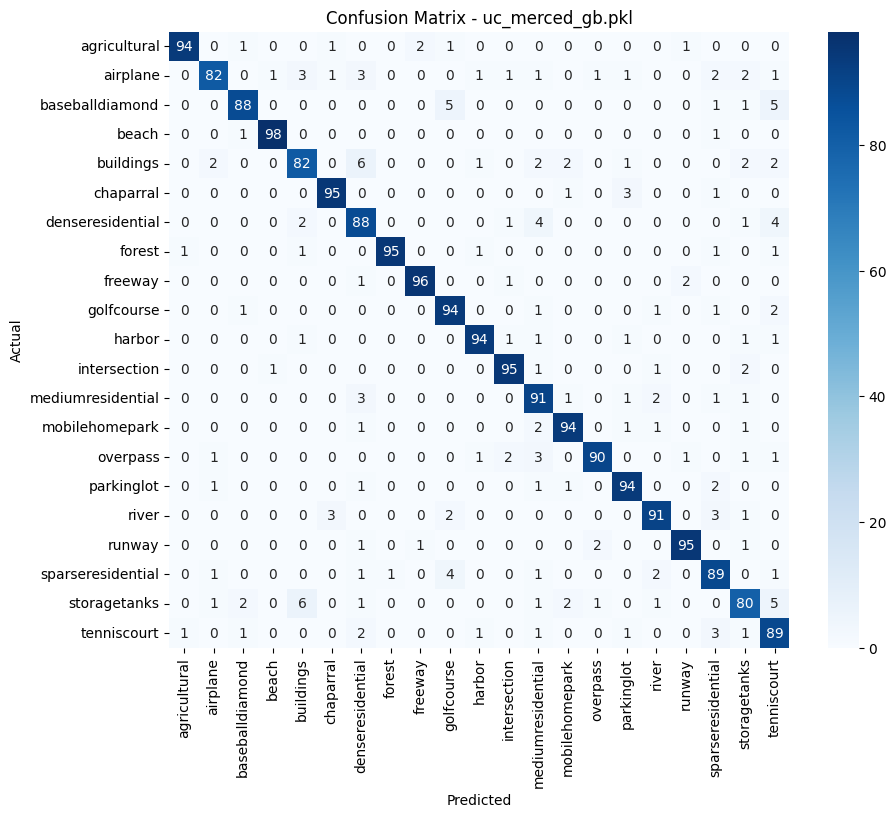


Model: uc_merced_mlp.pkl
                   precision    recall  f1-score   support

     agricultural       0.89      0.85      0.87       100
         airplane       0.83      0.87      0.85       100
  baseballdiamond       0.81      0.90      0.85       100
            beach       0.97      0.95      0.96       100
        buildings       0.87      0.87      0.87       100
        chaparral       0.95      0.98      0.97       100
 denseresidential       0.71      0.87      0.78       100
           forest       0.82      0.94      0.87       100
          freeway       0.86      0.76      0.81       100
       golfcourse       0.88      0.91      0.90       100
           harbor       0.96      0.97      0.97       100
     intersection       0.76      0.71      0.73       100
mediumresidential       0.72      0.71      0.71       100
   mobilehomepark       0.81      0.92      0.86       100
         overpass       0.79      0.78      0.78       100
       parkinglot       0.90 

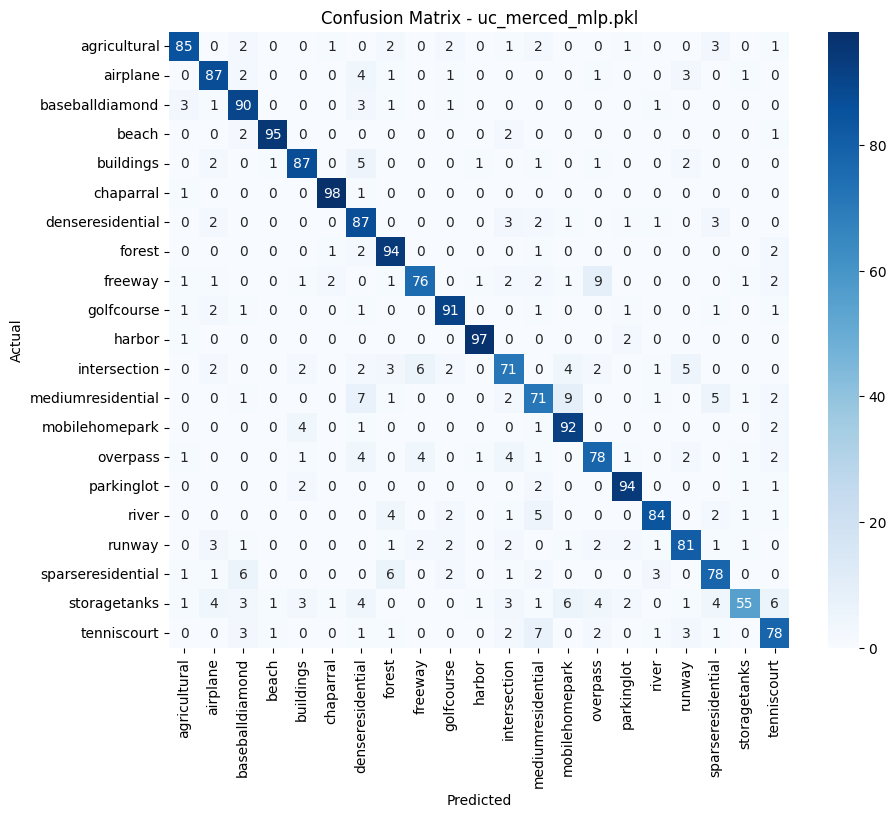


Model: uc_merced_rf.pkl
                   precision    recall  f1-score   support

     agricultural       0.99      0.98      0.98       100
         airplane       0.96      0.94      0.95       100
  baseballdiamond       0.92      0.98      0.95       100
            beach       0.96      1.00      0.98       100
        buildings       0.94      0.90      0.92       100
        chaparral       0.98      1.00      0.99       100
 denseresidential       0.91      0.93      0.92       100
           forest       0.95      0.98      0.97       100
          freeway       0.96      0.98      0.97       100
       golfcourse       0.93      0.94      0.94       100
           harbor       0.98      0.98      0.98       100
     intersection       0.95      0.97      0.96       100
mediumresidential       0.87      0.97      0.92       100
   mobilehomepark       0.98      0.94      0.96       100
         overpass       0.96      0.93      0.94       100
       parkinglot       0.92  

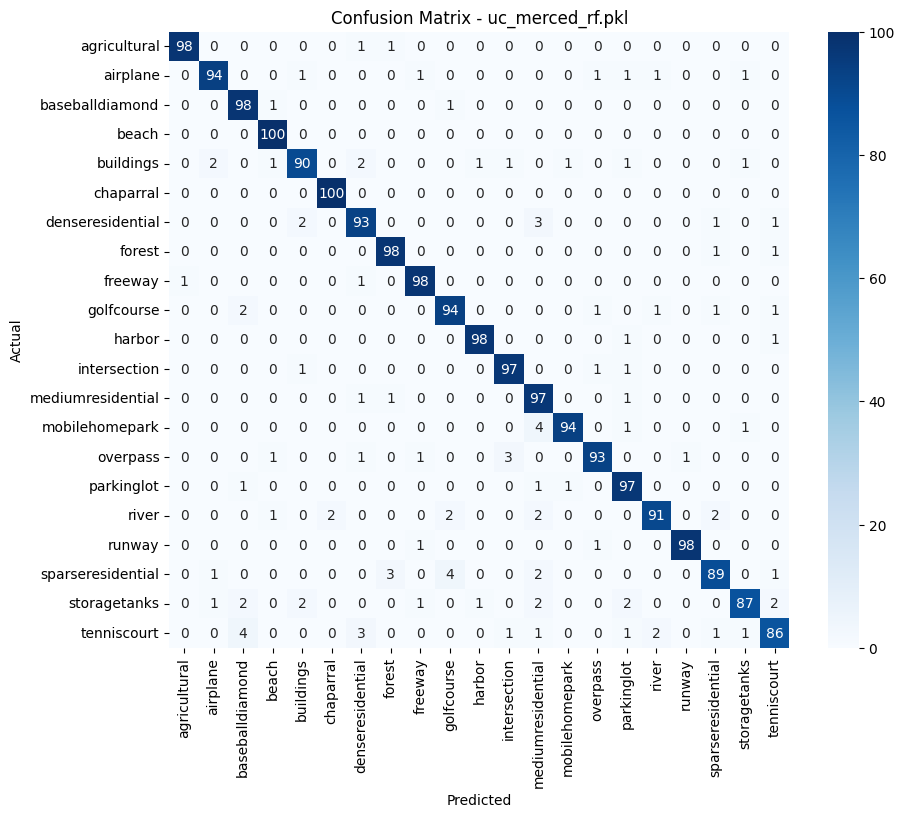

In [3]:
pca = joblib.load("../../models/ml_features/uc_merced_pca.pkl")
X_test_pca = pca.transform(X_test)

model_paths = [
    "../../models/ml_features/uc_merced_gb.pkl",
    "../../models/ml_features/uc_merced_mlp.pkl",
    "../../models/ml_features/uc_merced_rf.pkl"
]

for path in model_paths:
    model = joblib.load(path)
    y_pred = model.predict(X_test_pca)

    print(f"\nModel: {os.path.basename(path)}")
    print(classification_report(y_test, y_pred, target_names=classes))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.title(f"Confusion Matrix - {os.path.basename(path)}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

